# English word frequency from I.T. books

## Book list
- AI : Artificial Intelligence-A Modern Approach (3rd Edition).pdf
- computer networks : An Introduction to Computer Networks
- computer organization (architeture) : Structured Computer Organization (5th edition)
- data structures : Data Structures and Algorithms in Java (4th Edition)
- analysis of algorithms: An Introduction to the Analysis of Algorithms (2nd_Edition)
- formal languages and automata: An introduction to Formal languages and Automata (5th)
- theory of computation: Introduction to Theory of Computation (Anil Maheshwari)
- algorithms: Algorithms (Jeff Erickson)

In [1]:
# installing dependencies
!pip install -r requirements.txt

In [2]:
# import dependencies
from matplotlib.pyplot import figure
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PyPDF2 as pdf
import pandas as pd
import warnings
import nltk

In [3]:
# creating stopwords
nltk.download('stopwords')
warnings.filterwarnings("ignore")

stopwords = nltk.corpus.stopwords.words('english')

uselessWords = ['etal.','etal', '.mitpress.', '(xy', '1','2','3','4','5','6','7','8','9','a','b','c','d','e','f',
                'g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',')returns', '.','=', 
                '(', ')', '+', 'ł', '0', ':', 'anintroductiontocomputernetworksrelease1.9.18', '!', ')=', ';', 'ñ', 
                '(1', '+1', '1)', 'o(1)', ']', '=1', '}', '[', ':::', '˘', '1.', 't.', '>', ')+', 'th', ')+', 'ã', 
                'n=', 'n>', '<', '1+', 'o(n)', '))', 'www.it-ebooks.info', ').', 'aij', 'z;u', 'v.', '"', '=0', 's.', 
                '=n', 'pp.', '2.', '{', 'ˇ', '=2', '*', 'ýñ', 'dfs', '(a)', '+1)', '(24)', '12', 's1', 'a.', '(1)', 
                '(b)', 's2', 'n.', '-', 'f(n)', '2)', '?', '+2', 'nk', '11', 'o(n', '10', 'one', 'two', ',', 
                'anintroductiontocomputernetworks,release1918', '@', 'wwwit-ebooksinfo', 'wwwit-ebooksinfox', '‹',
                '_', '`', '#', '=(', 'anintroductiontocomputernetworksrelease1918',')',';']

stopwords = stopwords + uselessWords


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# creating file list
books = !dir "books"
books = ' '.join(books)
books = books.split(' ')
books = ["books/"+book for book in books if '.pdf' in book]
books

['books/book1.pdf',
 'books/book3.pdf',
 'books/book5.pdf',
 'books/book7.pdf',
 'books/book2.pdf',
 'books/book4.pdf',
 'books/book6.pdf',
 'books/book8.pdf']

In [5]:
# oppening files
files = list(map(lambda pdf: open(pdf, 'rb'), books))
files

[<_io.BufferedReader name='books/book1.pdf'>,
 <_io.BufferedReader name='books/book3.pdf'>,
 <_io.BufferedReader name='books/book5.pdf'>,
 <_io.BufferedReader name='books/book7.pdf'>,
 <_io.BufferedReader name='books/book2.pdf'>,
 <_io.BufferedReader name='books/book4.pdf'>,
 <_io.BufferedReader name='books/book6.pdf'>,
 <_io.BufferedReader name='books/book8.pdf'>]

In [6]:
# reading files as pdf
pdf_files = list(map(lambda file: pdf.PdfFileReader(file), files))
pdf_files

In [7]:
# creating function to extract text from pdf
def get_text(pdf_file):
    text = ''
    for i in range(pdf_file.getNumPages()):
        text += ' ' + pdf_file.getPage(i).extractText()
    text = text.replace('\n', ' ')
    return text

In [8]:
# creating list of contents
full_text_array = list(map(get_text, pdf_files))


In [9]:
# joining contents
full_text = ' '.join(full_text_array)


full_text = full_text.replace(",","") # removing comma
full_text = full_text.replace(".","") # removing dots
full_text = full_text.replace(")","") # removing )
full_text = full_text.replace("(","") # removing (

# transforming words to lower case and split words
full_text = full_text.lower().split()

# counting word frequency
dic = dict(Counter(full_text).most_common())

# creating pandas dataframe
df = pd.DataFrame({"terms": list(dic.keys()), "count": list(dic.values())})
df.set_index('terms', inplace=True)
df.head()

,count
terms,
the,13241
a,10936
n,9296
of,7529
1,6589


In [10]:
# creating dropable list
dropabble = []

# filtering terms with numbers
import re
regex = re.compile(r'\d+')
dropabble = list(filter(regex.search, df.index.tolist()))

# mergining with stops words contained in the text
L = [set(stopwords), set(df.index.tolist())]
dropabble += set.intersection(*L)

df.drop(dropabble, inplace= True)

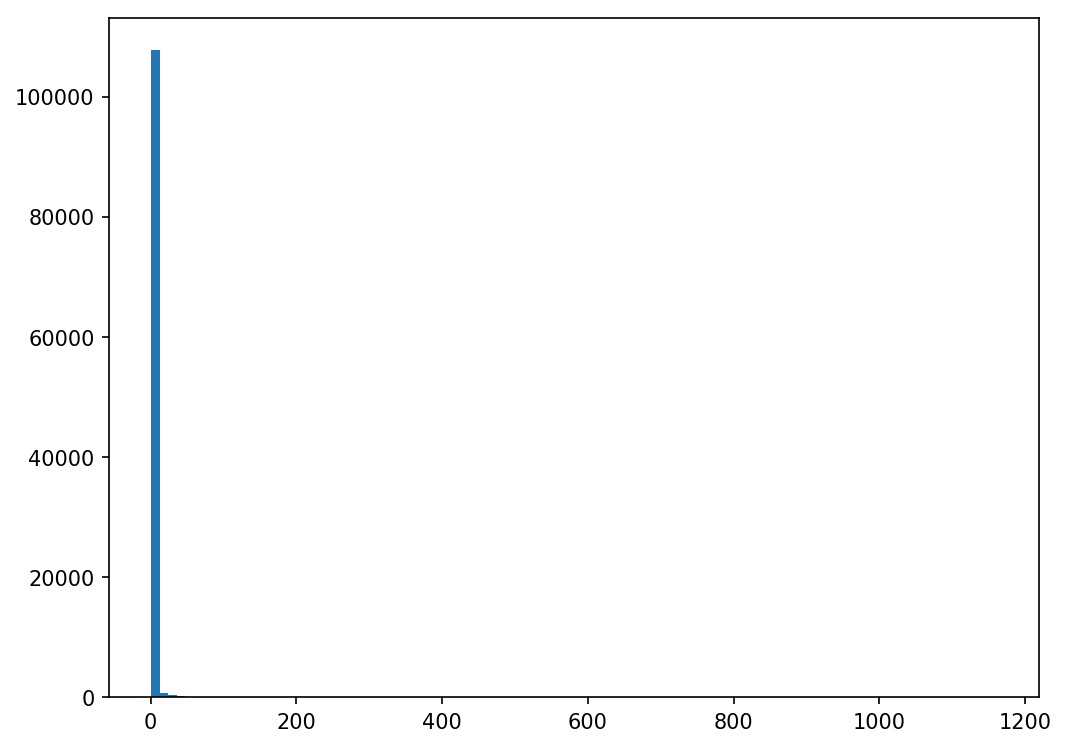

In [11]:
# plotting histogram of word frequency

figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')

plt.hist(df['count'], bins=100)
plt.show()

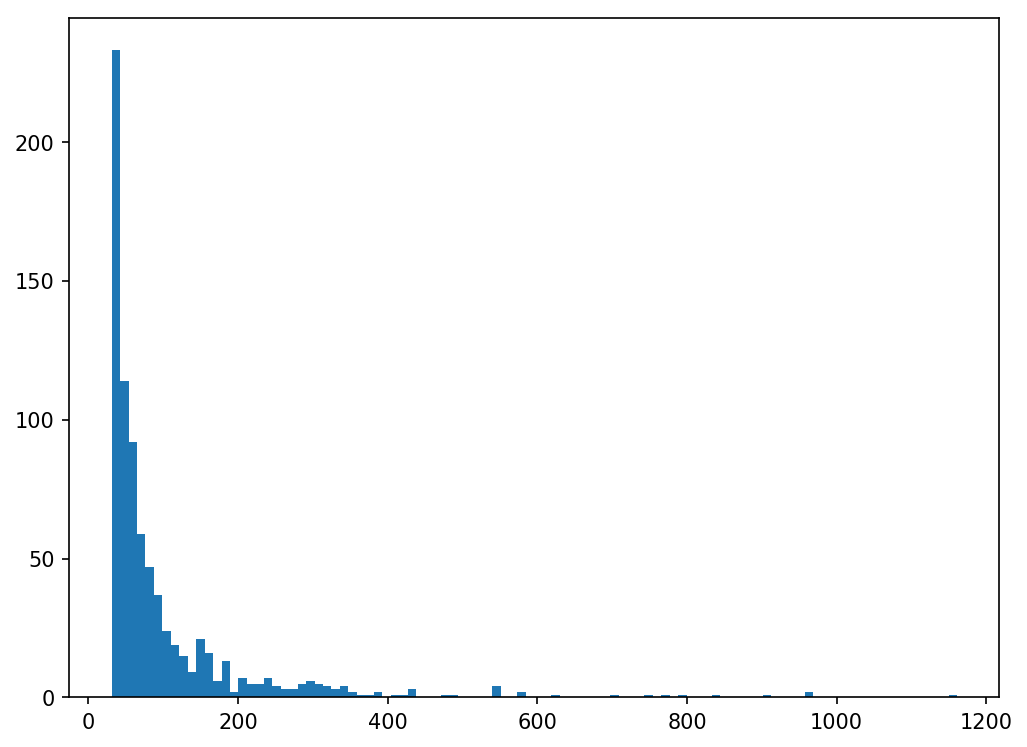

In [12]:
# plotting histogram of word frequency where frenquency greater than 30

figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')

df2 = df[df['count'] > 30]
histogram_example = plt.hist(df2['count'], bins=100)
plt.show()

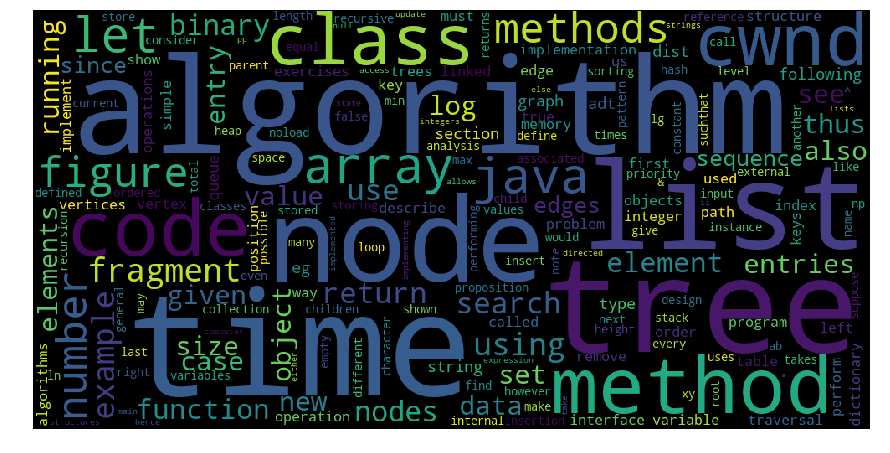

In [13]:
# plotting wordcloud

dic = {}
for i in range(len(df2)):
    dic[df.index[i]] = df.iloc[i]['count']

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dic)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
# Saving to csv
df2.to_csv('term_frequency.csv')